### Import libraries

In [1]:
import pathlib
import pandas as pd
import seaborn as sns

import sys
sys.path.append("../utils")
from load_utils import split_data
from analysis_utils import get_class_colors, show_1D_umap, show_2D_umap, show_3D_umap

2023-05-23 09:59:06.415525: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


### Load training data

In [2]:
training_data_path = pathlib.Path("../3.normalize_data/normalized_data/training_data_spherized.csv.gz")
training_data = pd.read_csv(training_data_path, compression="gzip", index_col=0)

training_data

Mitocheck_Phenotypic_Class                             Cell_UUID  \
0                         Large  21da27ab-873a-41f4-ab98-49170cae9a2d   
1                         Large  82f7949b-4ea2-45c8-8dd9-7854caf49077   
2                         Large  cec7234f-fe35-4411-aded-f8112bb31219   
3                         Large  43d9e7c9-c9ec-45ce-8820-048bfb896989   
4                         Large  63ce6652-338e-4afd-9c77-dbc0e903bf92   
...                         ...                                   ...   
2911                 OutOfFocus  380728fc-28b0-423f-b8a7-07be1af590d9   
2912                 OutOfFocus  30ed67c7-8de2-4d78-bce9-3fa1aff28565   
2913                 OutOfFocus  2960b13e-6090-4592-b2a9-d1c4c1b24b50   
2914                 OutOfFocus  fbc9ce6a-2b29-4115-b218-4ee5b8c50ac1   
2915                 OutOfFocus  2ef448b0-cc39-4d00-bf1c-31115bc5a9f3   

      Location_Center_X  Location_Center_Y Metadata_Plate  Metadata_Well  \
0                   397                618      LT0010_27            173   
1                   359                584      LT0010_27            173   
2                   383                685      LT0010_27            173   
3                   932                532      LT0013_38             42   
4                   477                130      LT0013_38             42   
...                 ...                ...            ...            ...   
2911                383                219      LT0601_01            217   
2912                975                294      LT0603_03              2   
2913                898                302      LT0603_03              2   
2914                946                281      LT0603_03              2   
2915                999                421      LT0603_03              2   

      Metadata_Frame  Metadata_Site Metadata_Plate_Map_Name  \
0                 83              1           LT0010_27_173   
1                 83              1           LT0010_27_173   
2                 83              1           LT0010_27_173   
3                 75              1            LT0013_38_42   
4                 75              1            LT0013_38_42   
...              ...            ...                     ...   
2911              49              1           LT0601_01_217   
2912              49              1             LT0603_03_2   
2913              49              1             LT0603_03_2   
2914              49              1             LT0603_03_2   
2915              49              1             LT0603_03_2   

                        Metadata_DNA  ... DP__efficientnet_1270  \
0     LT0010_27/LT0010_27_173_83.tif  ...             -1.240288   
1     LT0010_27/LT0010_27_173_83.tif  ...             -1.262342   
2     LT0010_27/LT0010_27_173_83.tif  ...             -1.309594   
3      LT0013_38/LT0013_38_42_75.tif  ...             -1.322861   
4      LT0013_38/LT0013_38_42_75.tif  ...             -1.295659   
...                              ...  ...                   ...   
2911  LT0601_01/LT0601_01_217_49.tif  ...             -1.129018   
2912    LT0603_03/LT0603_03_2_49.tif  ...             -1.243983   
2913    LT0603_03/LT0603_03_2_49.tif  ...             -1.295627   
2914    LT0603_03/LT0603_03_2_49.tif  ...             -1.245852   
2915    LT0603_03/LT0603_03_2_49.tif  ...             -1.265068   

      DP__efficientnet_1271 DP__efficientnet_1272  DP__efficientnet_1273  \
0                 -0.217985             -1.712067               0.677377   
1                 -0.210863             -1.709567               0.558519   
2                 -0.209424             -1.692875               0.750167   
3                 -0.199119             -1.729906               0.749667   
4                 -0.199460             -1.695019               0.685430   
...                     ...                   ...                    ...   
2911              -0.063595             -1.623186               0.028274   
2912              -0.180107             -1.66

### Set UMAP display settings, save directory, class colors

In [3]:
point_size = 25
alpha = 0.6
color_palette = "bright"

classes_1 = [
    "Large",
    "Prometaphase",
    "Grape",
    "Interphase",
    "Apoptosis",
    "ADCCM",
    "Folded",
    "SmallIrregular",
    "Polylobed",
    "Metaphase",
    "Binuclear",
    "Hole",
    "Anaphase",
    "MetaphaseAlignment",
    "Elongated",
    "OutOfFocus",
]

# classes that aren't commented out will get a color for their particular class
# those that are commented out will be colored gray and labeled "other"
# in the second set of umaps
classes_2 = [
    # "Large",
    "Prometaphase",
    "Grape",
    "Interphase",
    "Apoptosis",
    "ADCCM",
    # "Folded",
    # "SmallIrregular",
    # "Polylobed",
    # "Metaphase",
    # "Binuclear",
    # "Hole",
    # "Anaphase",
    # "MetaphaseAlignment",
    # "Elongated",
    # "OutOfFocus",
]

class_colors_1 = get_class_colors(classes_1, "rainbow")
class_colors_2 = get_class_colors(classes_2, "bright")

Showing UMAPs created with CP features


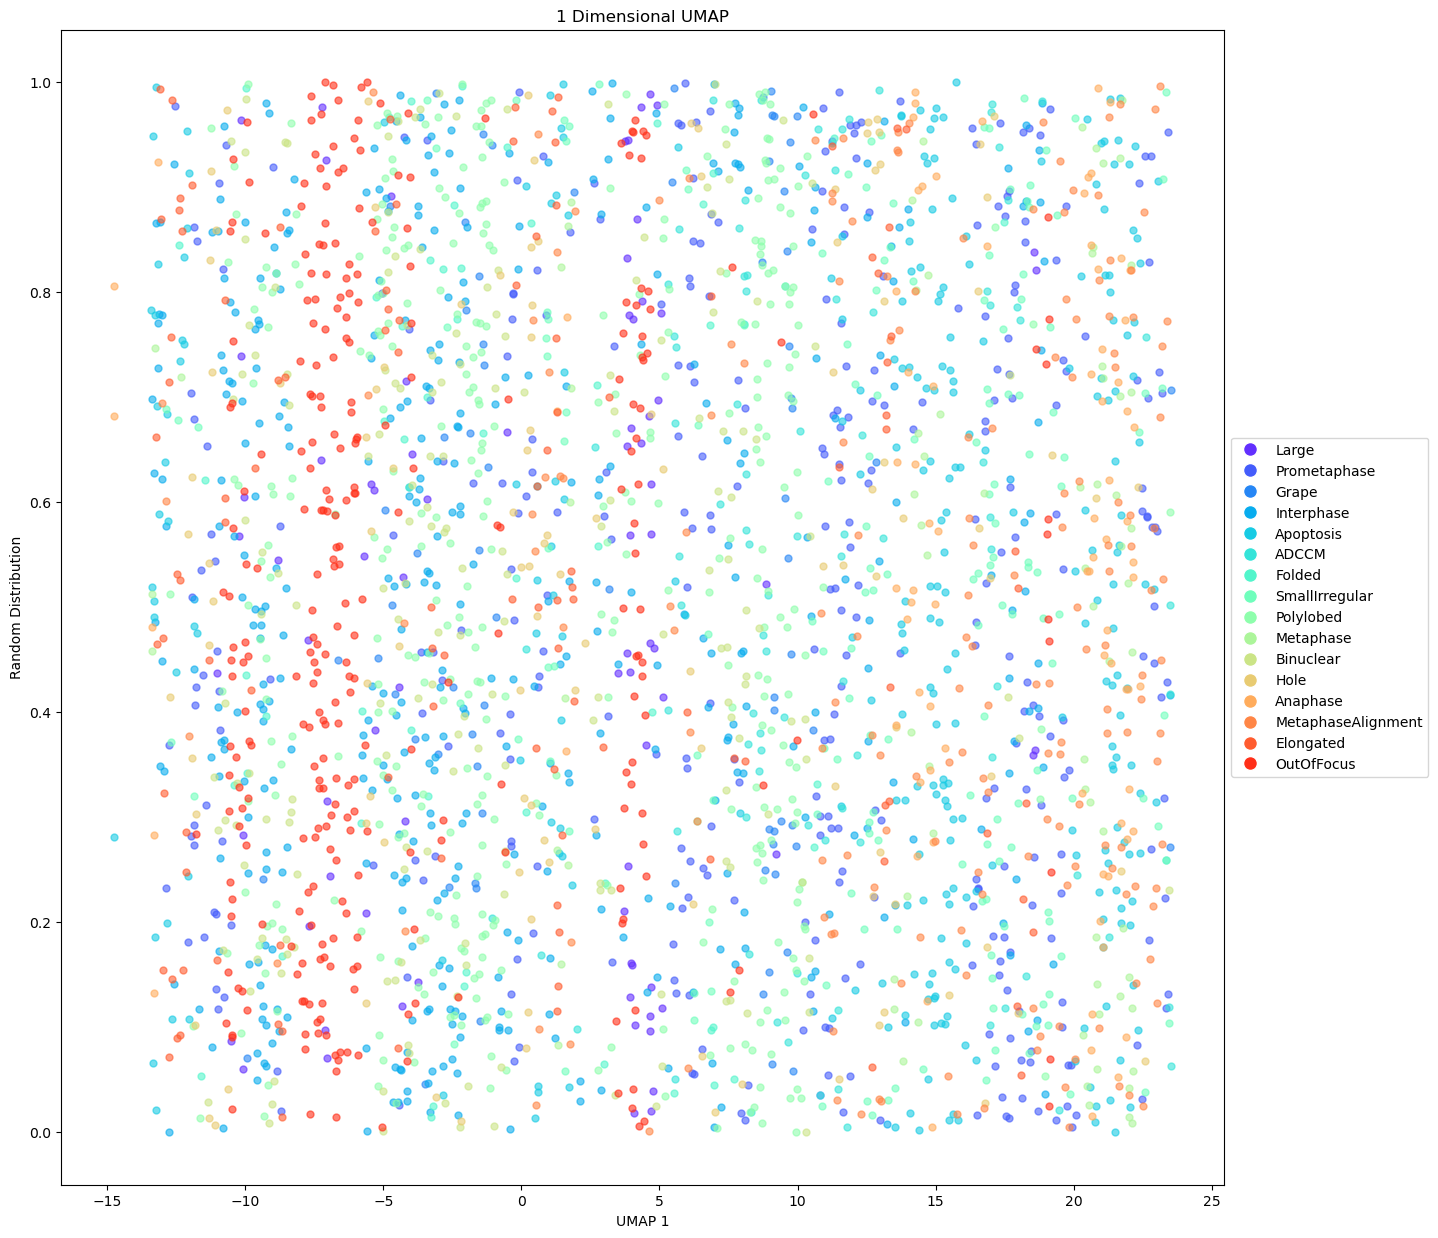

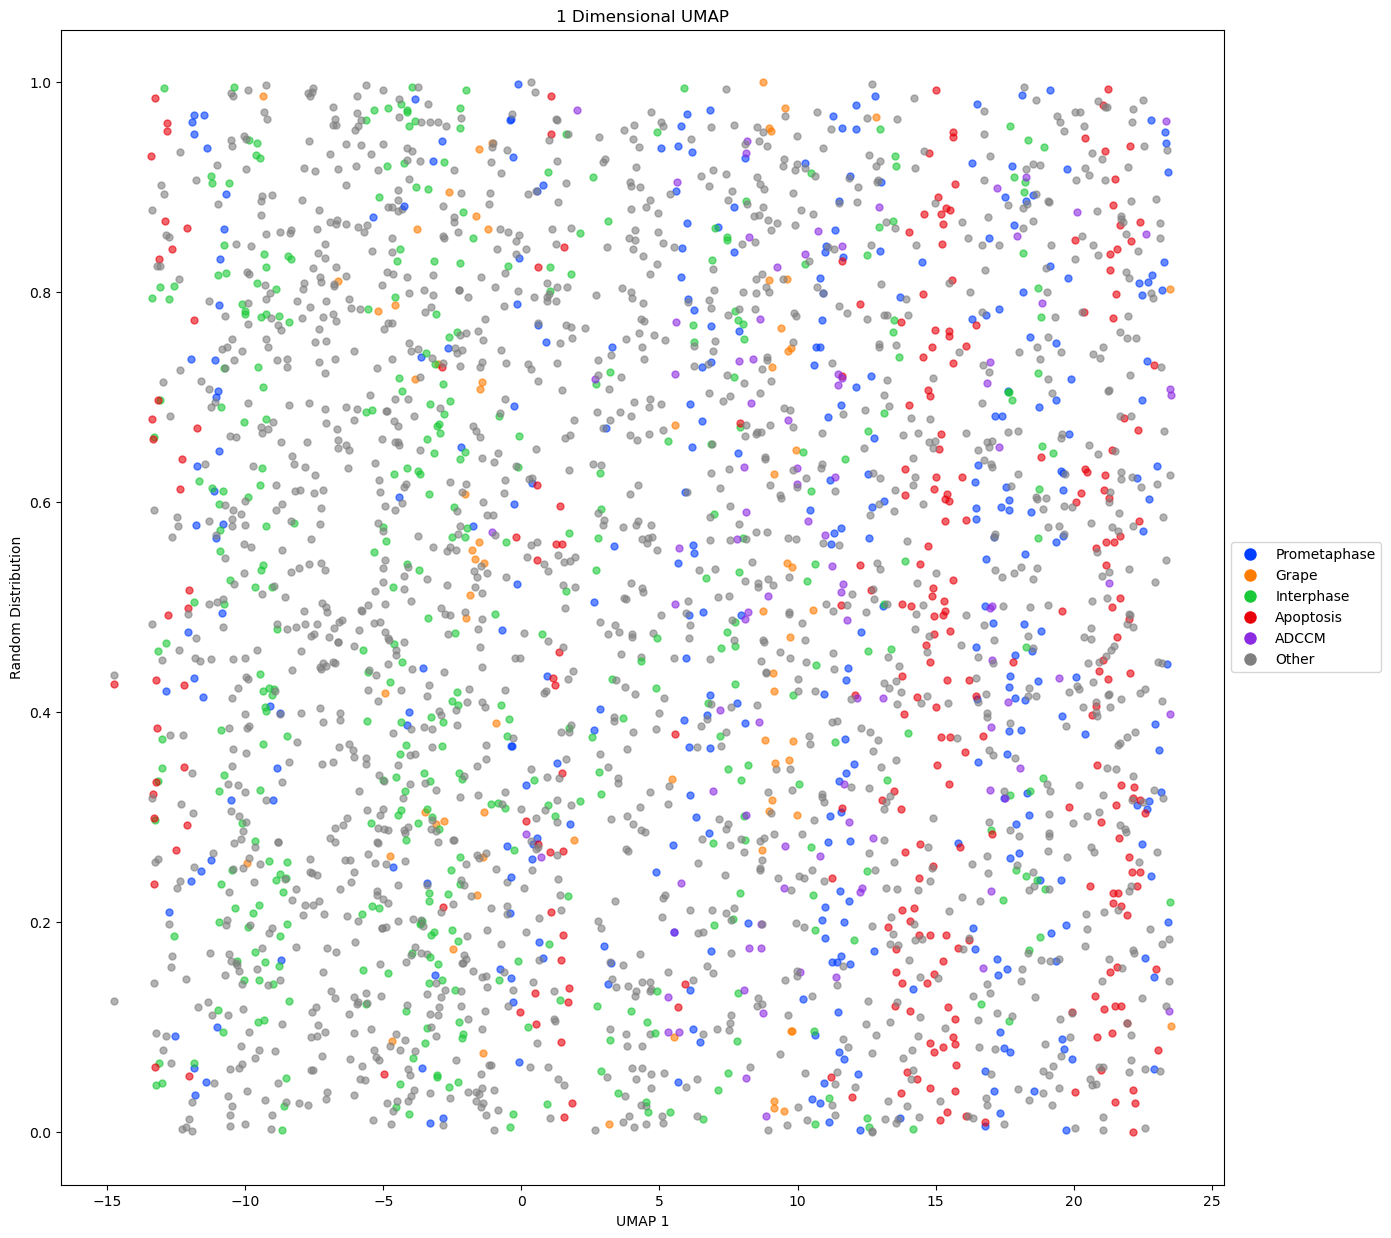

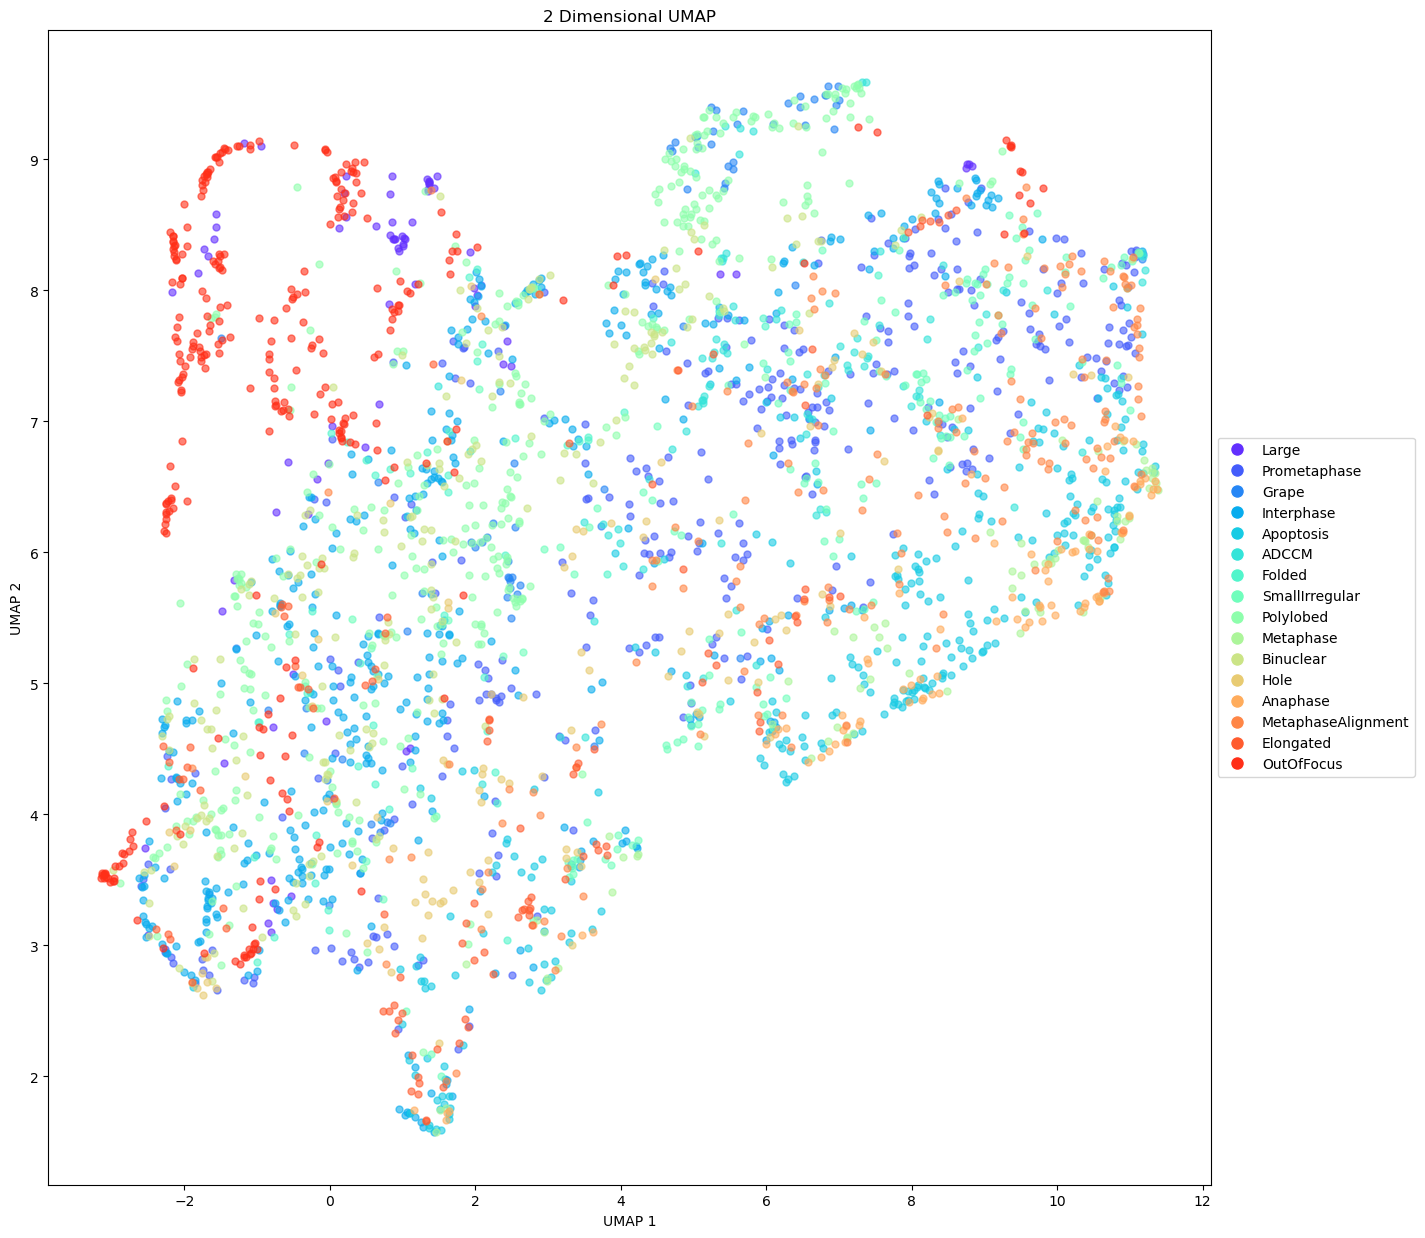

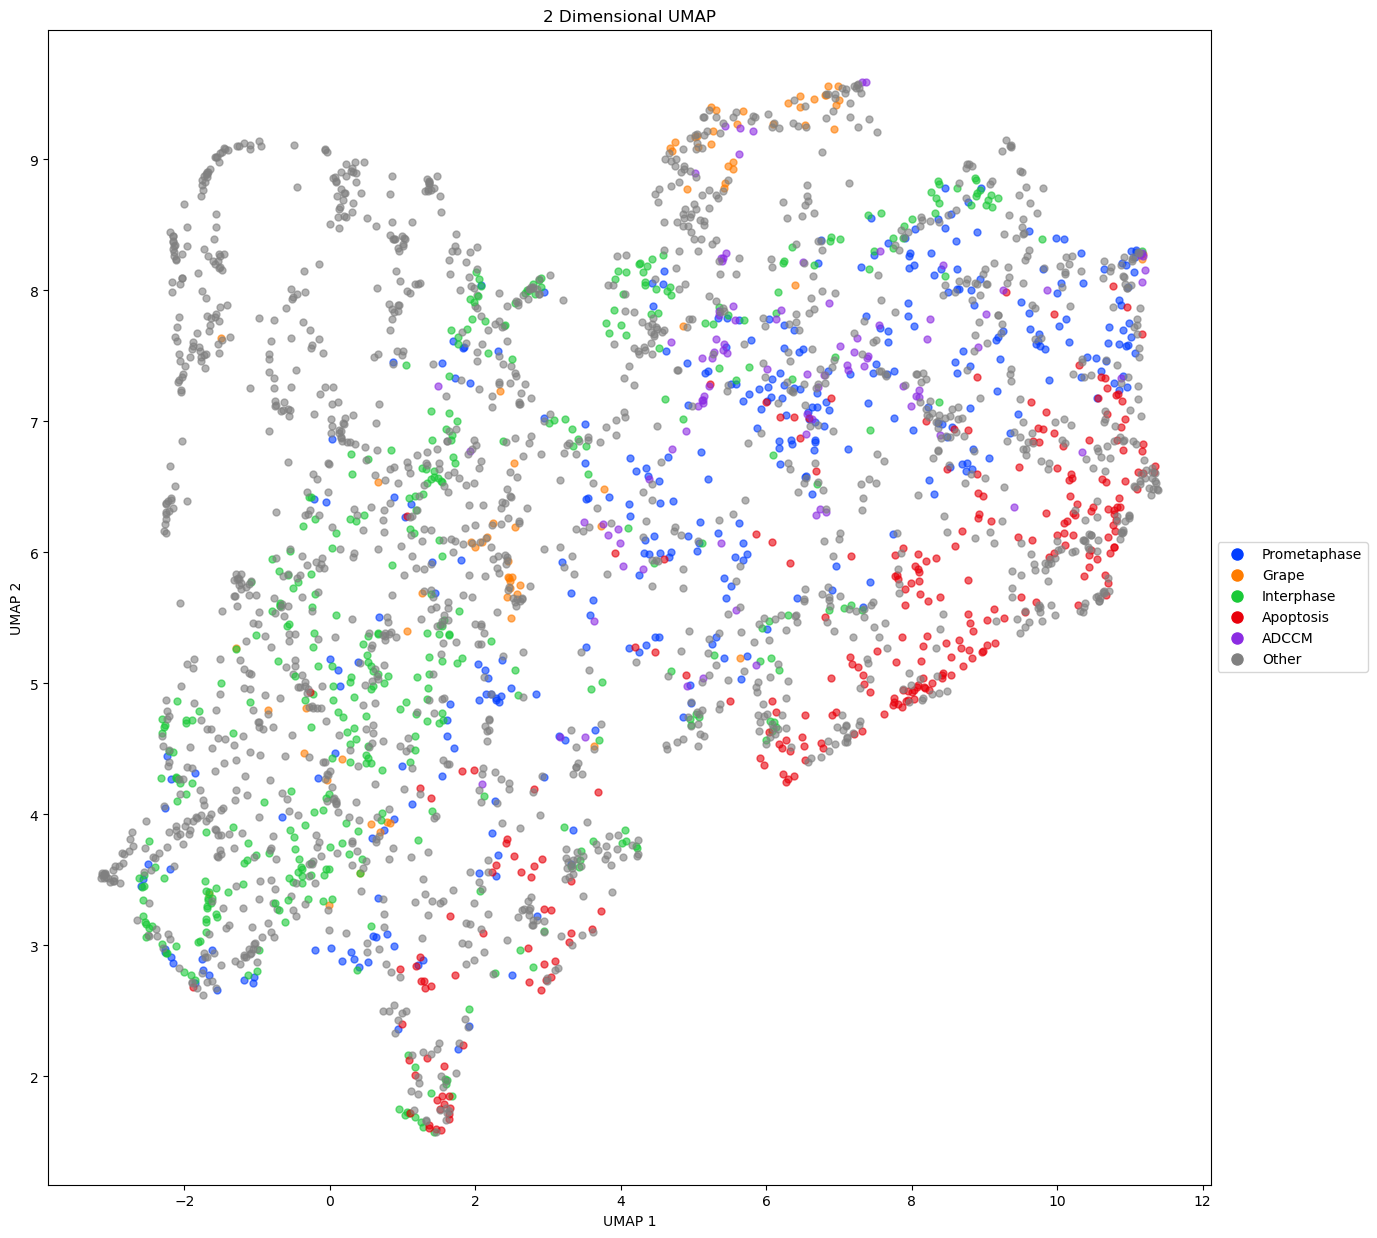

Showing UMAPs created with DP features


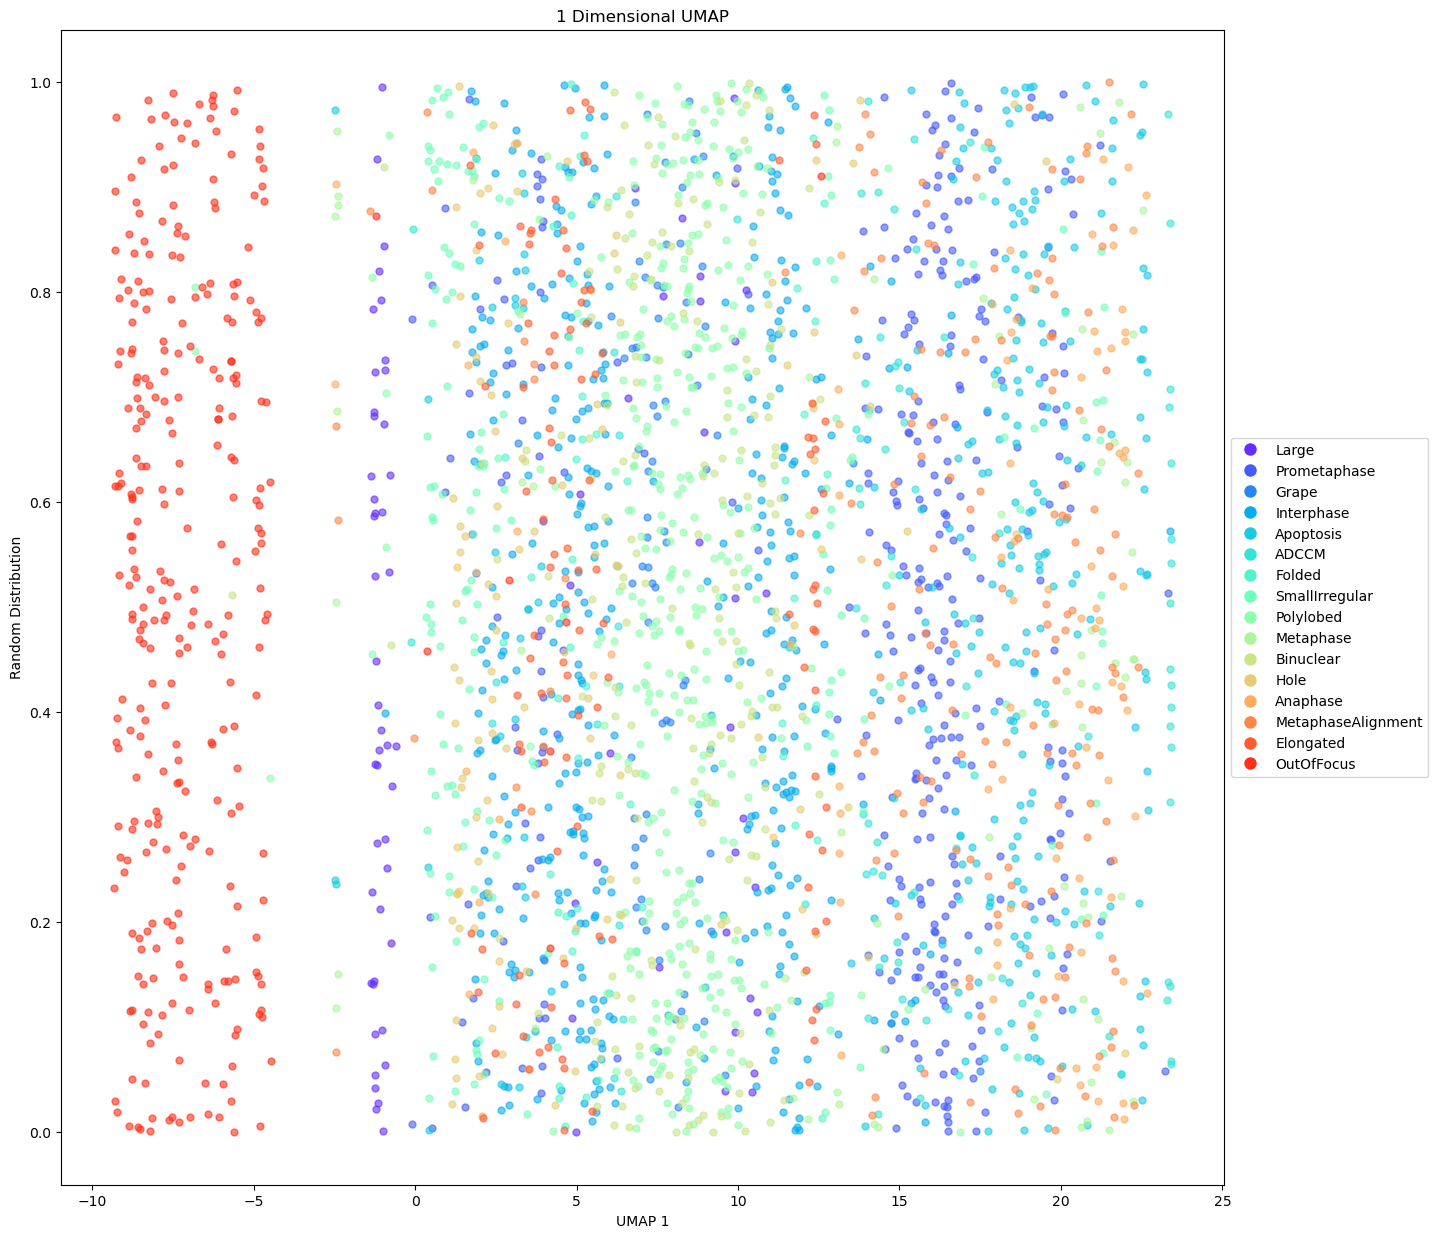

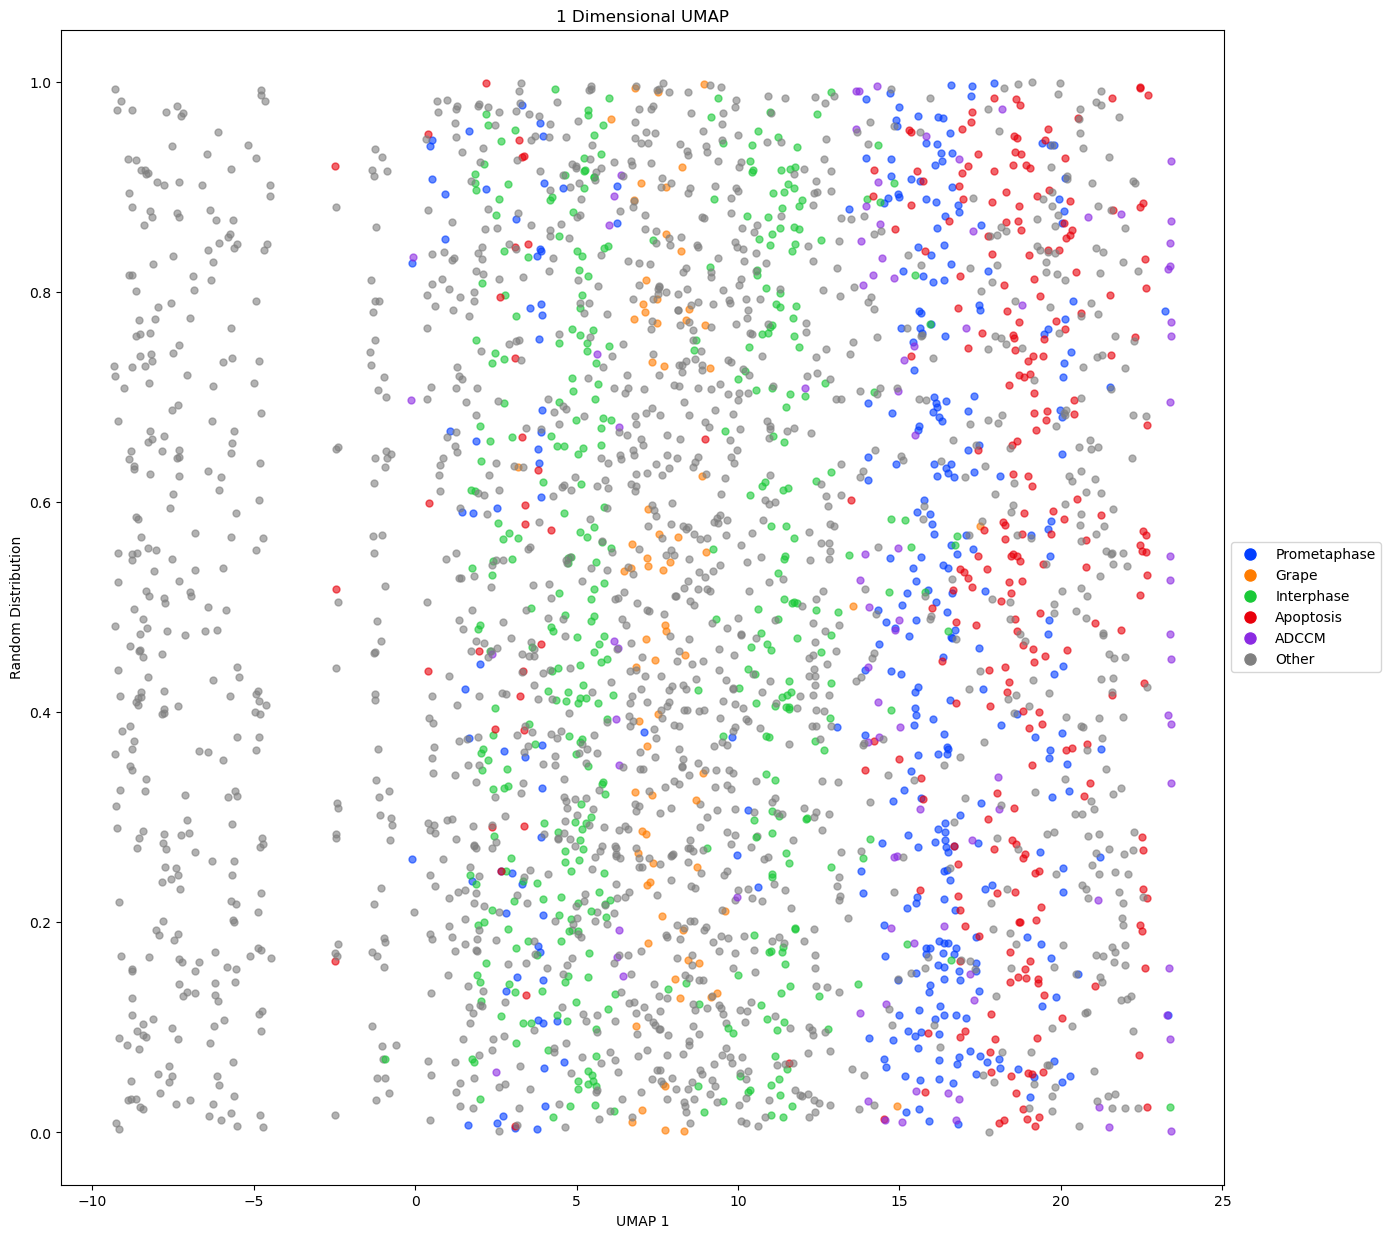

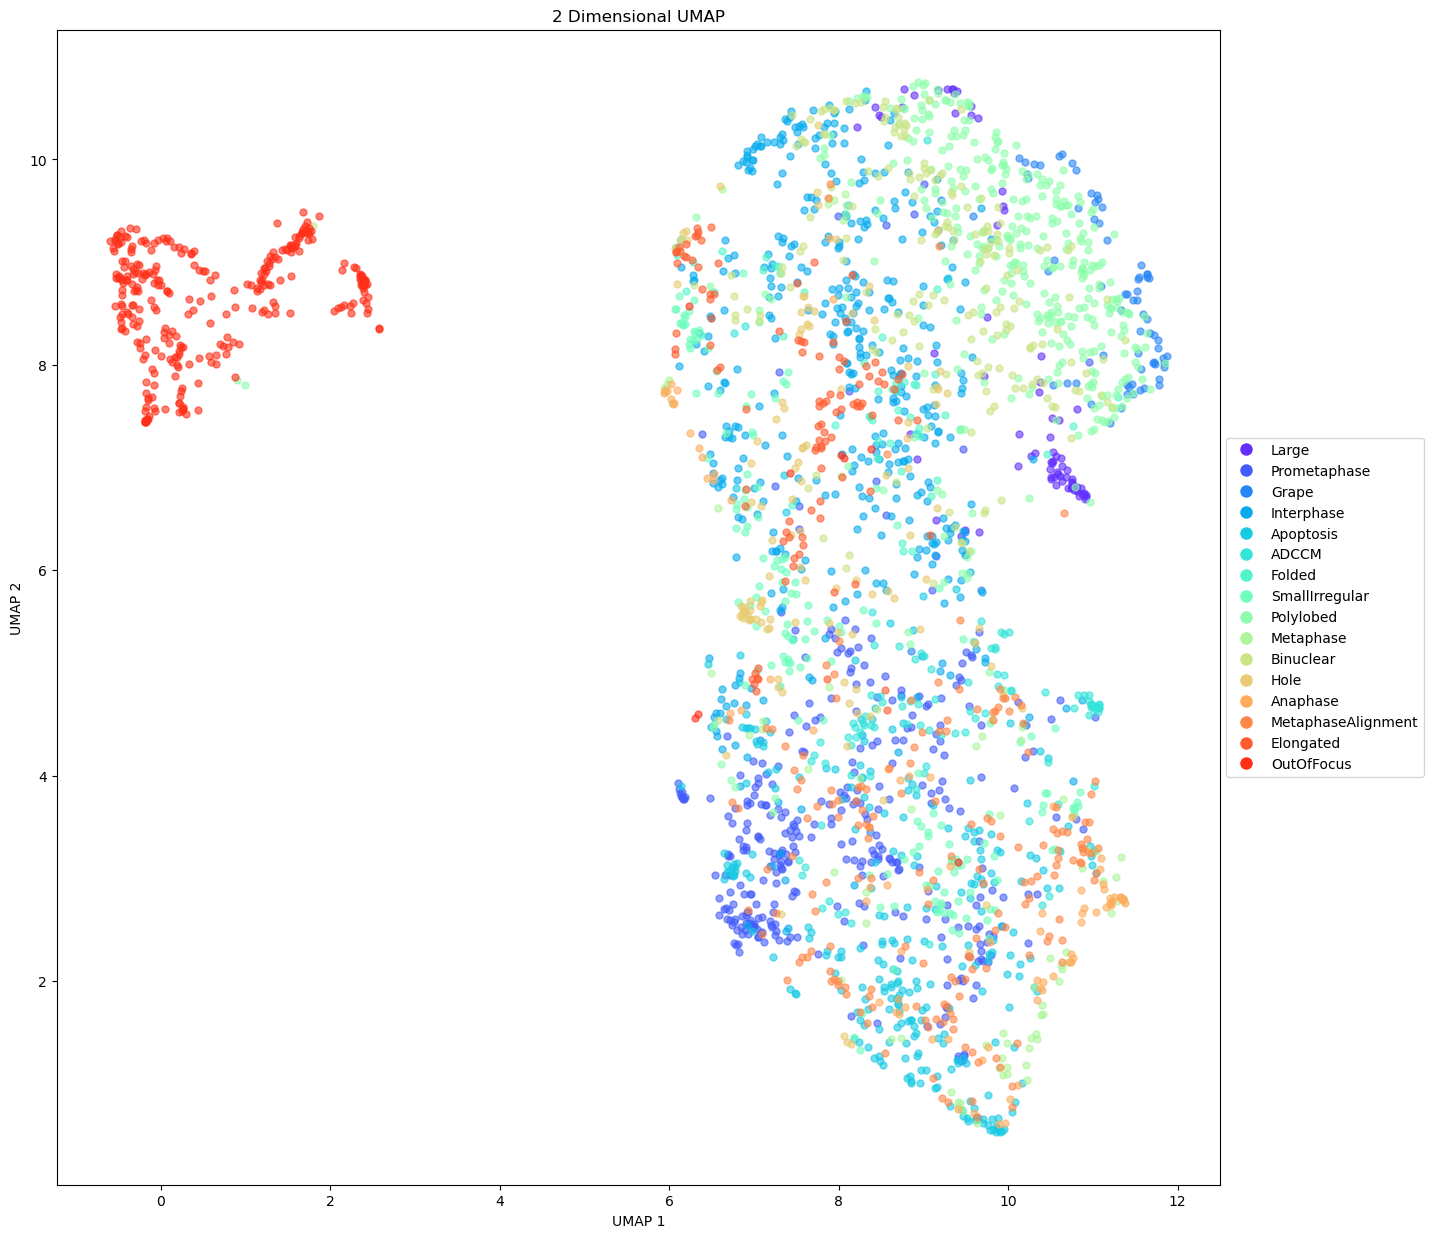

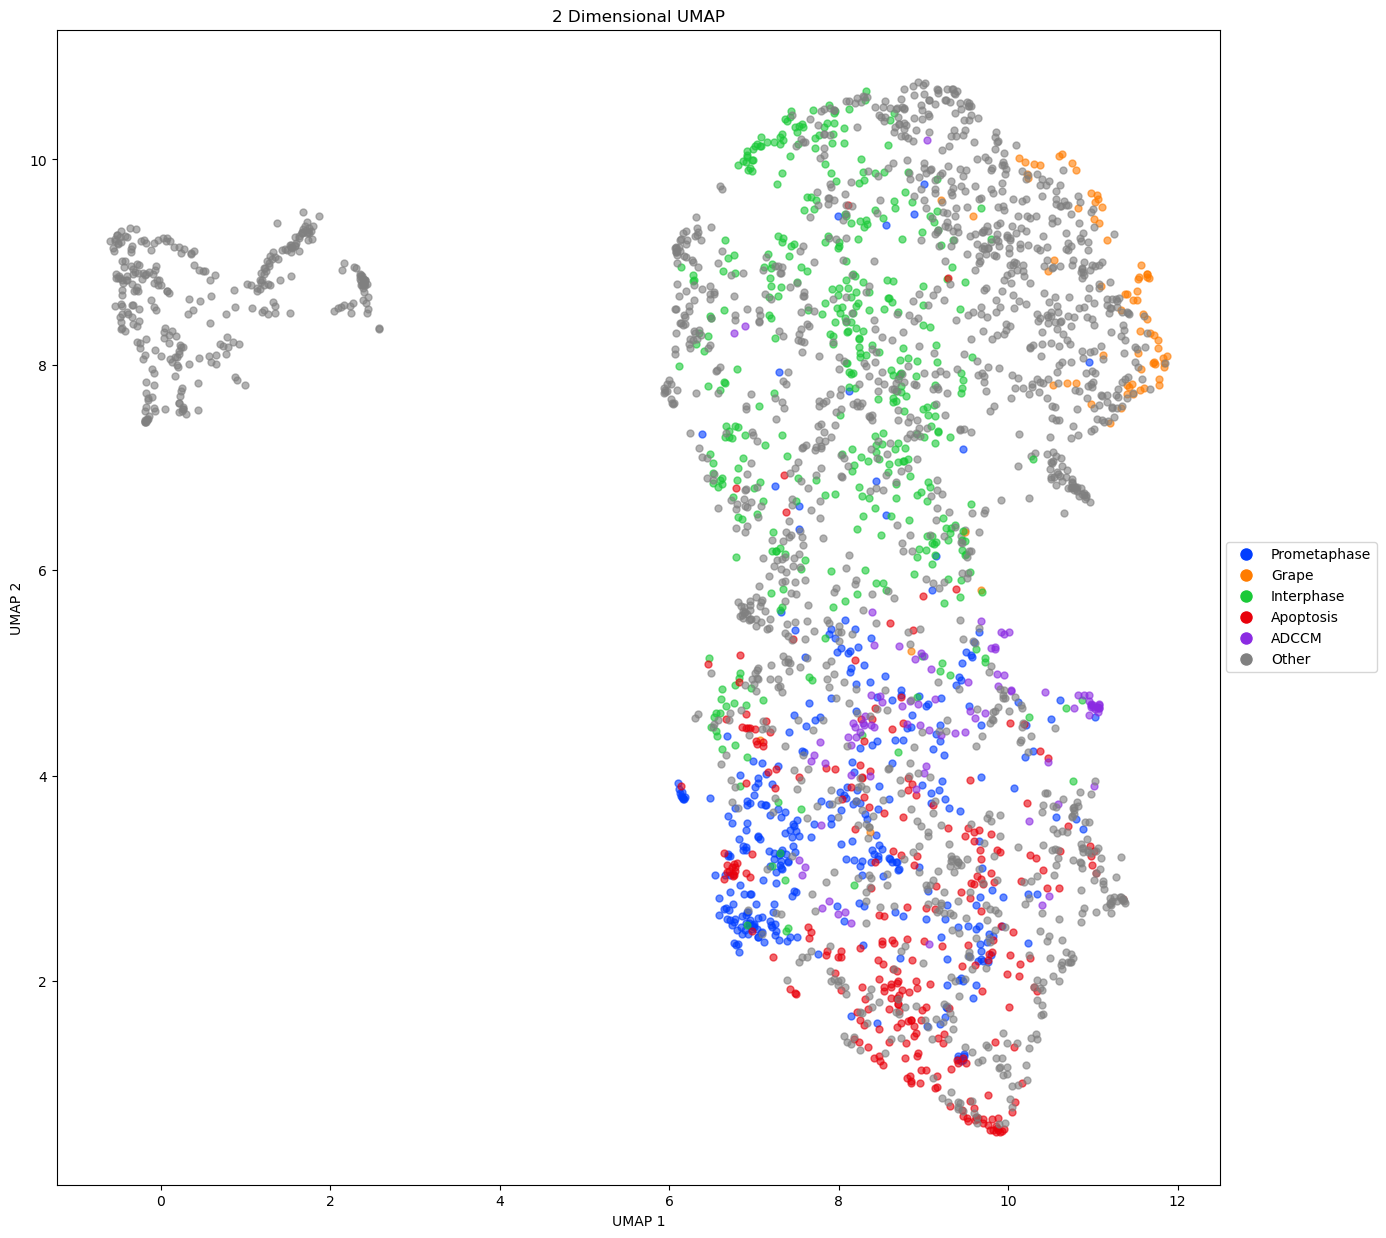

Showing UMAPs created with CP_and_DP features


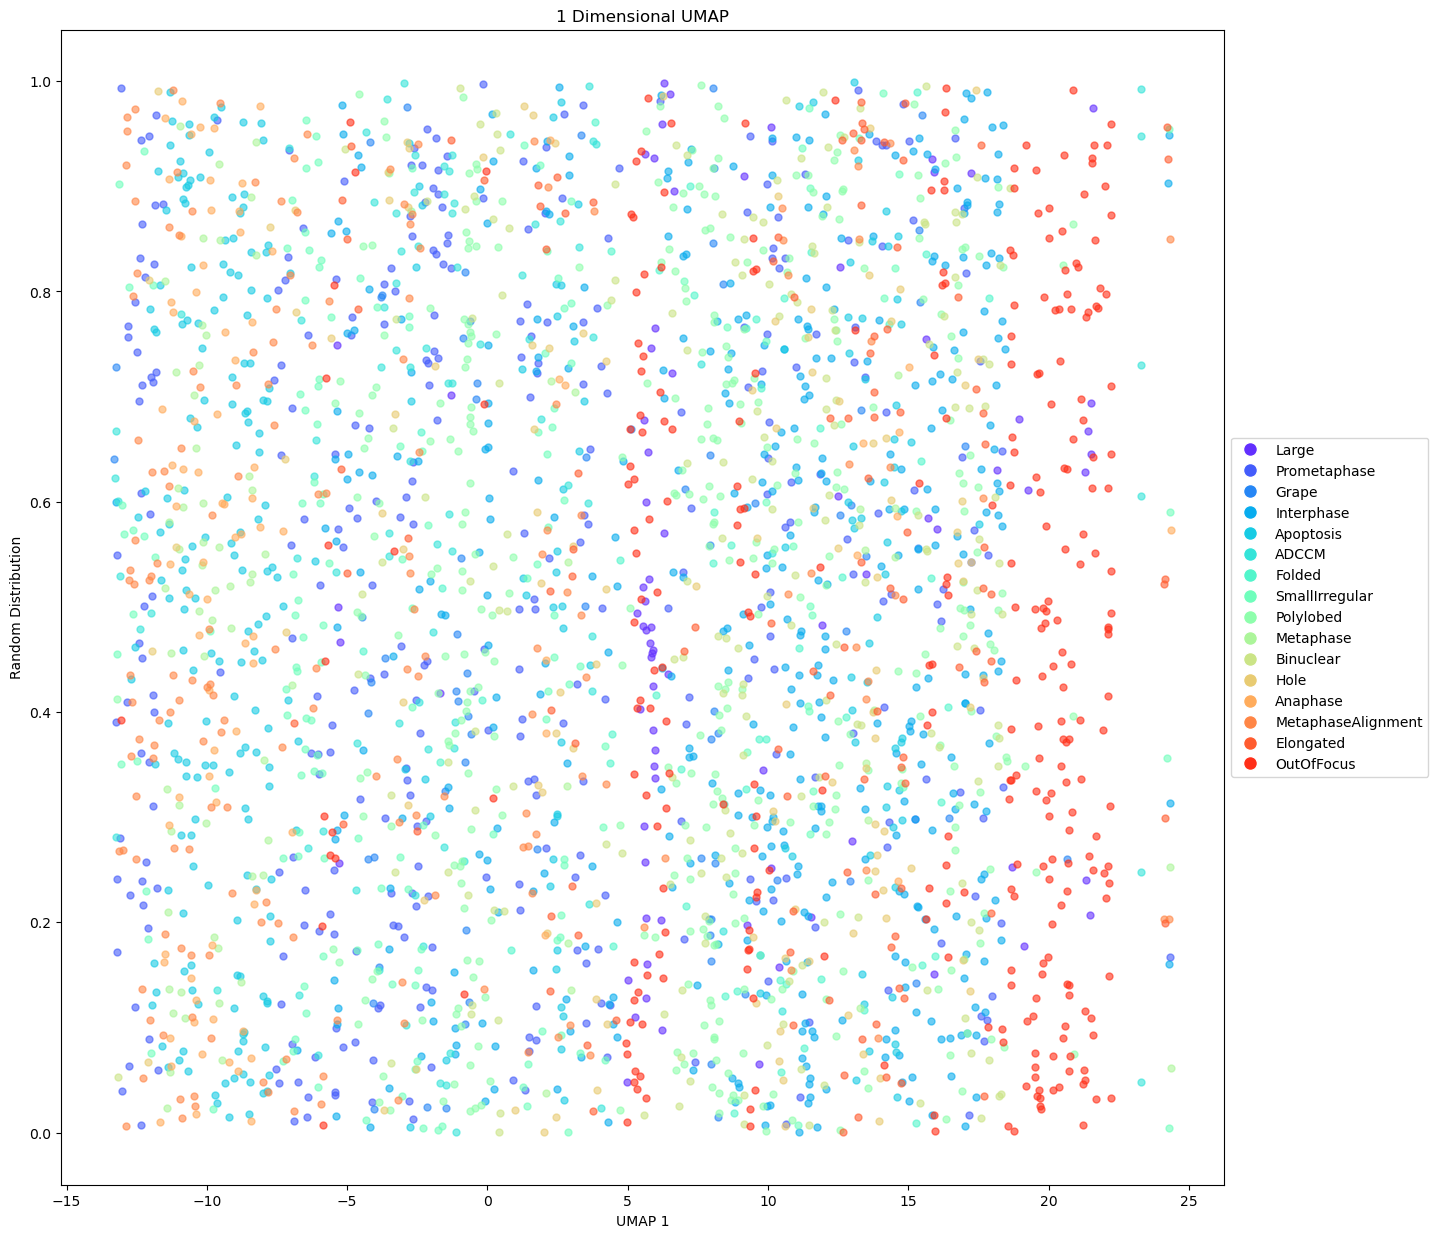

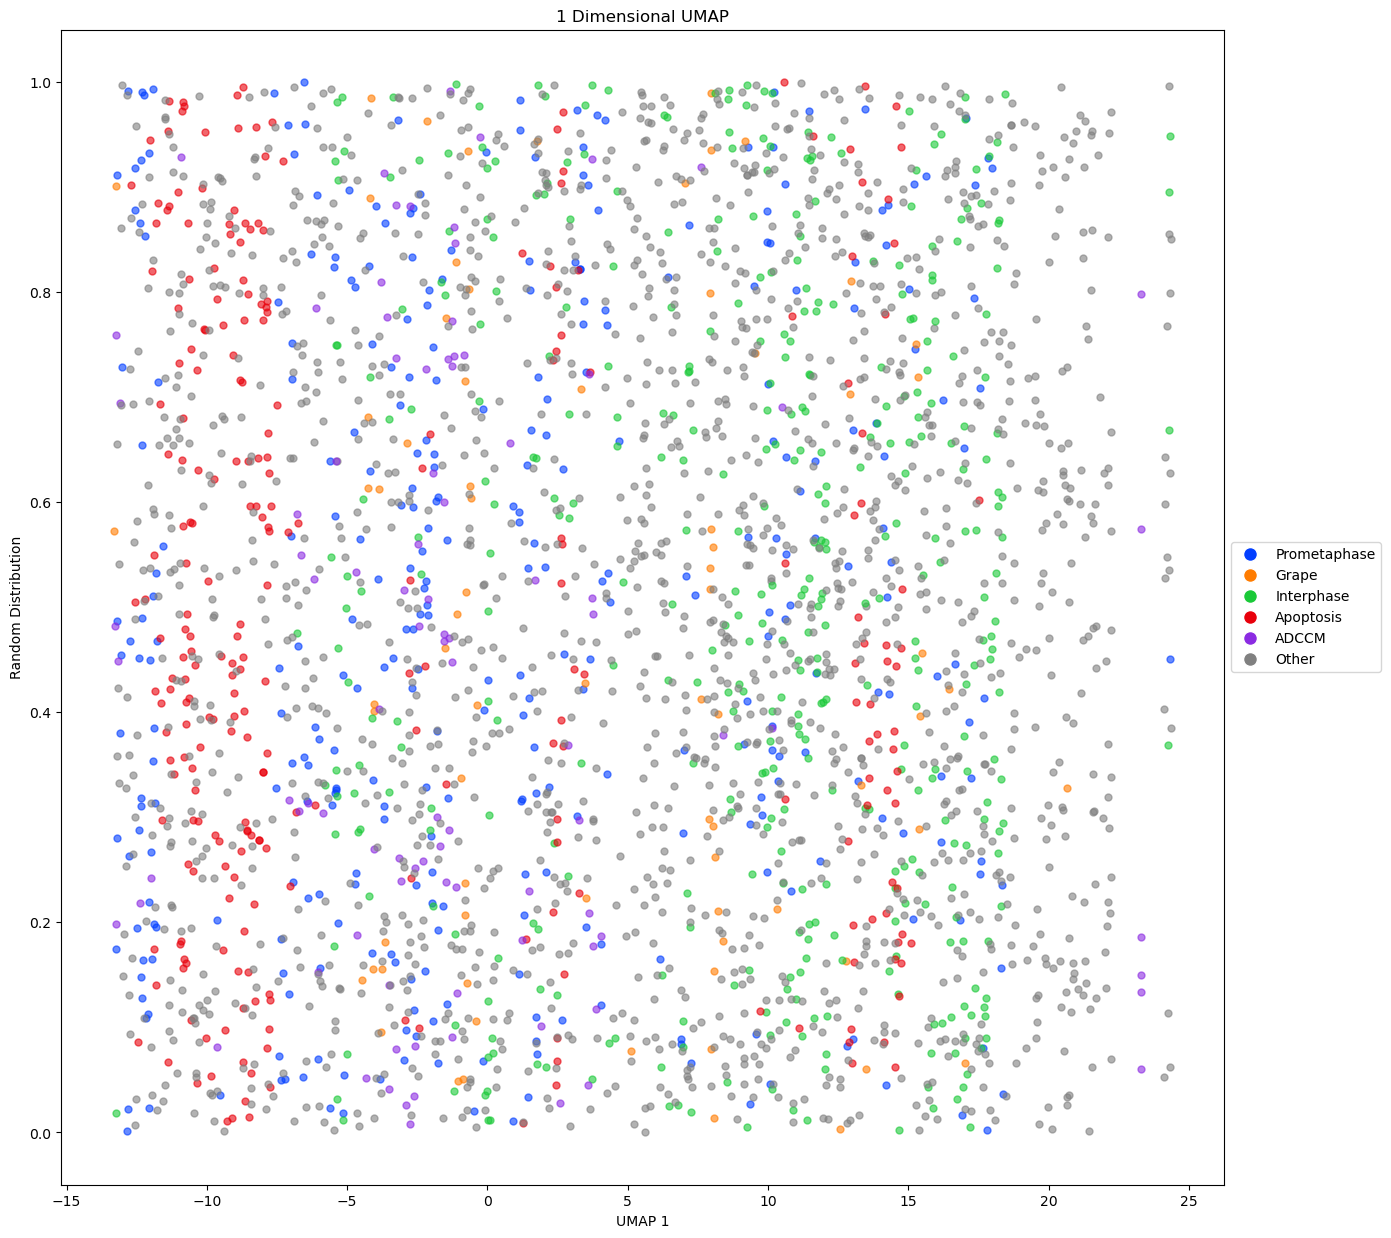

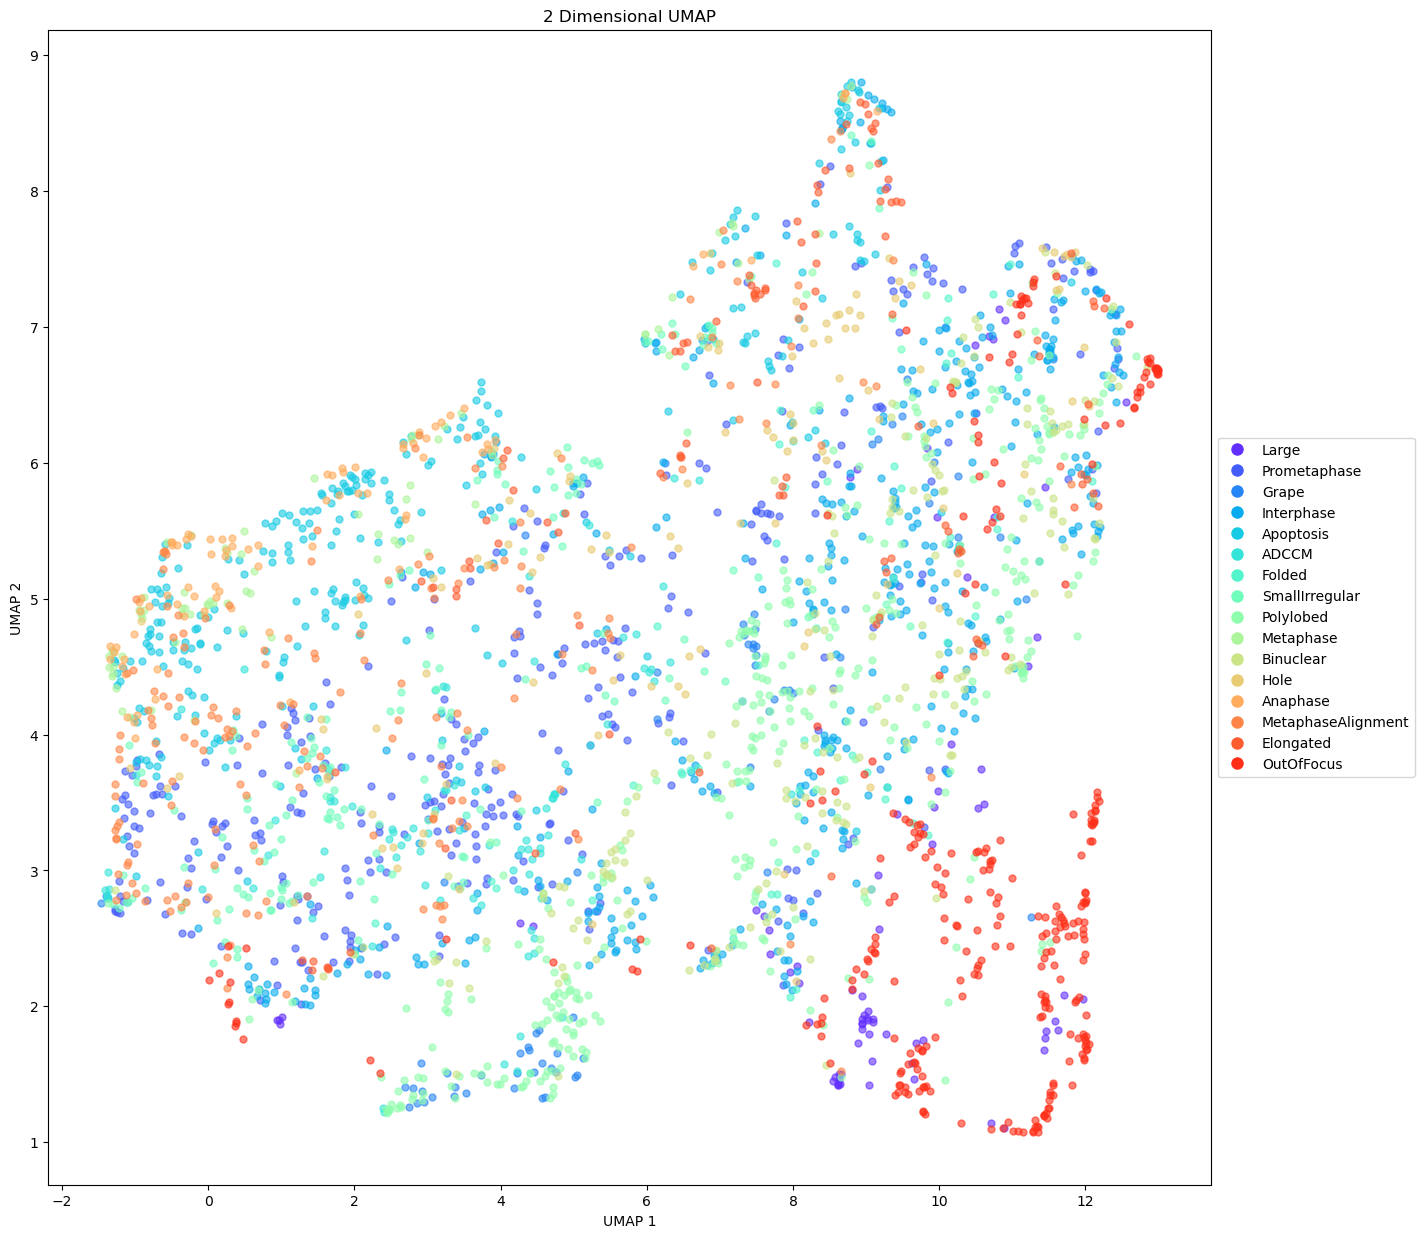

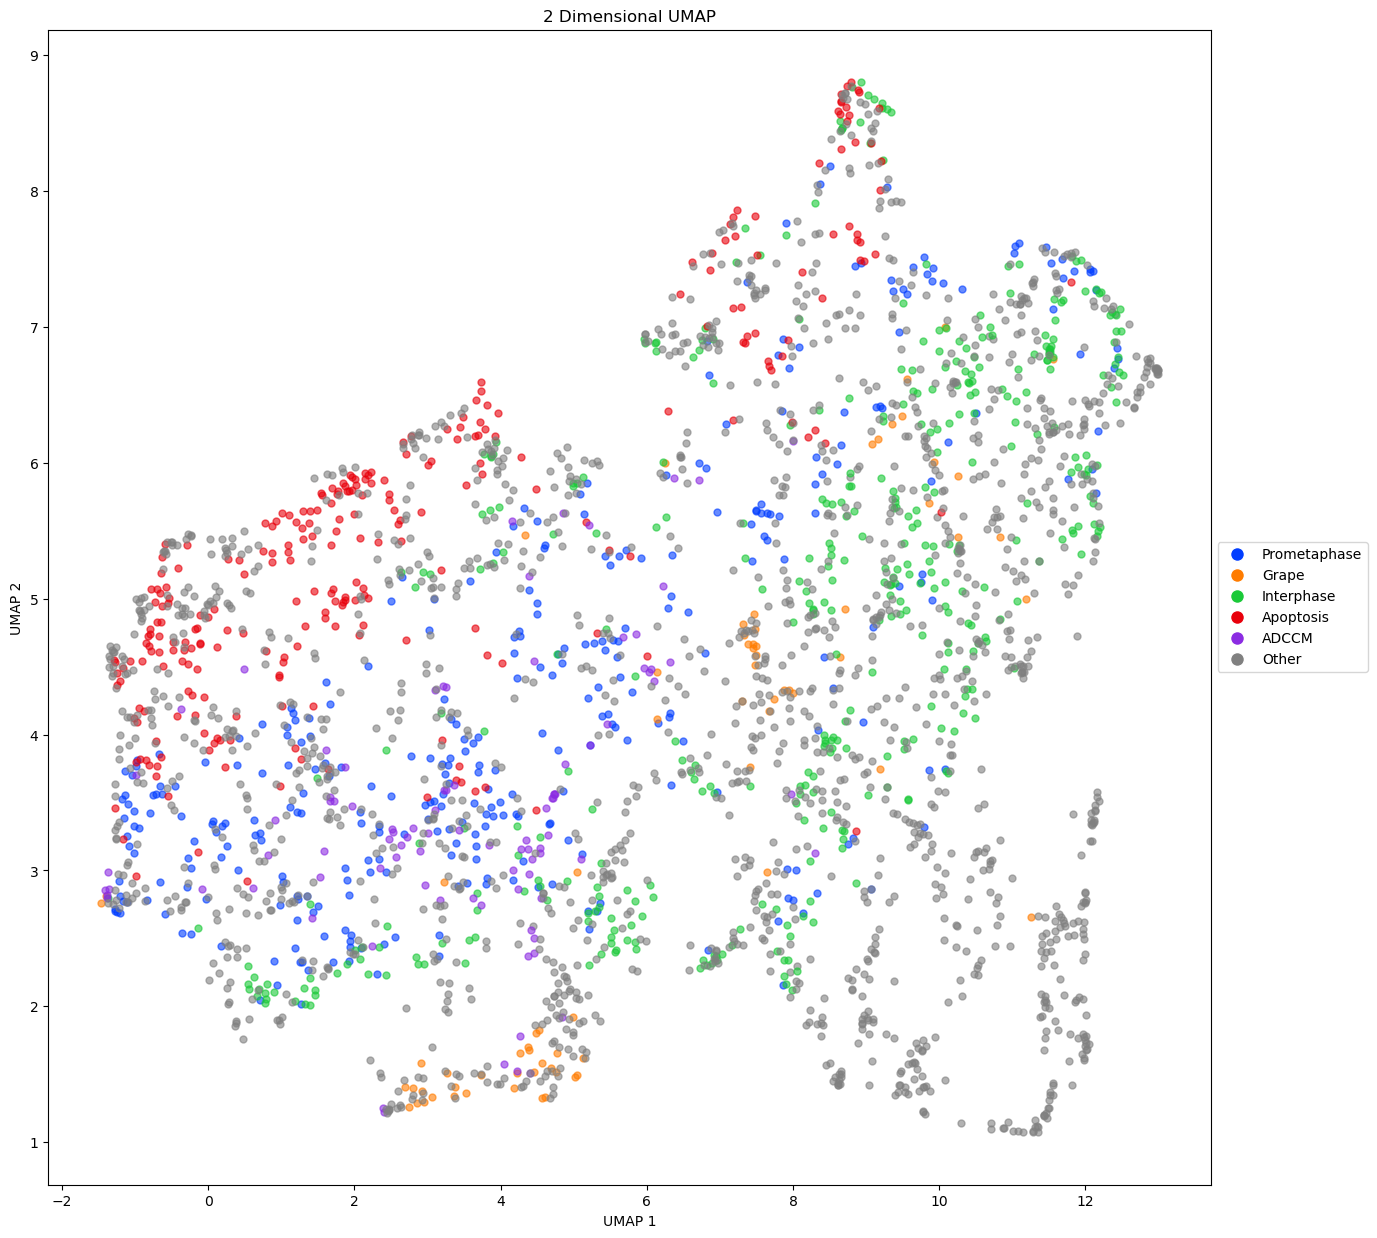

In [4]:
feature_types = ["CP", "DP", "CP_and_DP"]

for feature_type in feature_types:
    print(f"Showing UMAPs created with {feature_type} features")
    
    # the trainind data dataframe is split into two components:
    # metadata: info about the cell including its labeled phenotypic class, location, perturbation, etc
    # feature data: the CP, DP, or merged features for each cell
    metadata_dataframe, feature_data = split_data(training_data, feature_type)
    phenotypic_classes = metadata_dataframe["Mitocheck_Phenotypic_Class"]
    
    # show 1D umaps
    # class colors 1 - all classes included
    show_1D_umap(feature_data, phenotypic_classes, class_colors_1, point_size=point_size, alpha=alpha)
    # class colors 2 - only certain classes included
    show_1D_umap(feature_data, phenotypic_classes, class_colors_2, point_size=point_size, alpha=alpha)
    
    # show 2D umaps
    # class colors 1 - all classes included
    show_2D_umap(feature_data, phenotypic_classes, class_colors_1, point_size=point_size, alpha=alpha)
    # class colors 2 - only certain classes included
    show_2D_umap(feature_data, phenotypic_classes, class_colors_2, point_size=point_size, alpha=alpha)